In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [15]:
df =pd.read_csv("C:\\Users\\Vignesh T\\Downloads\\GOOG.csv")

In [16]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [18]:
df.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.0
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1216.317067,1227.430936,1204.176436,1215.260779,1.601590e+06,0.0,1.0
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05,383.333358,387.570873,378.777099,382.446995,6.960172e+05,0.0,0.0
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05,668.260000,672.300000,663.284000,671.000000,3.467530e+05,0.0,1.0
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06,960.802500,968.757500,952.182500,959.005000,1.173522e+06,0.0,1.0
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,0.0,1.0
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,0.0,1.0
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,0.0,1.0


In [19]:
df['date'] = pd.to_datetime(df['date'])
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [20]:
df=df.drop(columns=['symbol','adjClose','adjHigh','adjLow','adjOpen','adjVolume','divCash','splitFactor'])
df

,date,close,high,low,open,volume
0,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065
1,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517
2,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471
3,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357
4,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538
...,...,...,...,...,...,...
1253,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453
1254,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253
1255,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337
1256,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733


In [21]:
df = df.sort_values(by='date')
df

,date,close,high,low,open,volume
0,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065
1,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517
2,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471
3,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357
4,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538
...,...,...,...,...,...,...
1253,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453
1254,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253
1255,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337
1256,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733


In [22]:
df['date'] = df['date'].dt.strftime('%Y-%m-%d')
df

,date,close,high,low,open,volume
0,2016-06-14,718.27,722.470,713.1200,716.48,1306065
1,2016-06-15,718.92,722.980,717.3100,719.00,1214517
2,2016-06-16,710.36,716.650,703.2600,714.91,1982471
3,2016-06-17,691.72,708.820,688.4515,708.65,3402357
4,2016-06-20,693.71,702.480,693.4100,698.77,2082538
...,...,...,...,...,...,...
1253,2021-06-07,2466.09,2468.000,2441.0725,2451.32,1192453
1254,2021-06-08,2482.85,2494.495,2468.2400,2479.90,1253253
1255,2021-06-09,2491.40,2505.000,2487.3300,2499.50,1006337
1256,2021-06-10,2521.60,2523.260,2494.0000,2494.01,1561733


In [23]:
df = df.set_index('date')
df

,close,high,low,open,volume
date,,,,,
2016-06-14,718.27,722.470,713.1200,716.48,1306065
2016-06-15,718.92,722.980,717.3100,719.00,1214517
2016-06-16,710.36,716.650,703.2600,714.91,1982471
2016-06-17,691.72,708.820,688.4515,708.65,3402357
2016-06-20,693.71,702.480,693.4100,698.77,2082538
...,...,...,...,...,...
2021-06-07,2466.09,2468.000,2441.0725,2451.32,1192453
2021-06-08,2482.85,2494.495,2468.2400,2479.90,1253253
2021-06-09,2491.40,2505.000,2487.3300,2499.50,1006337


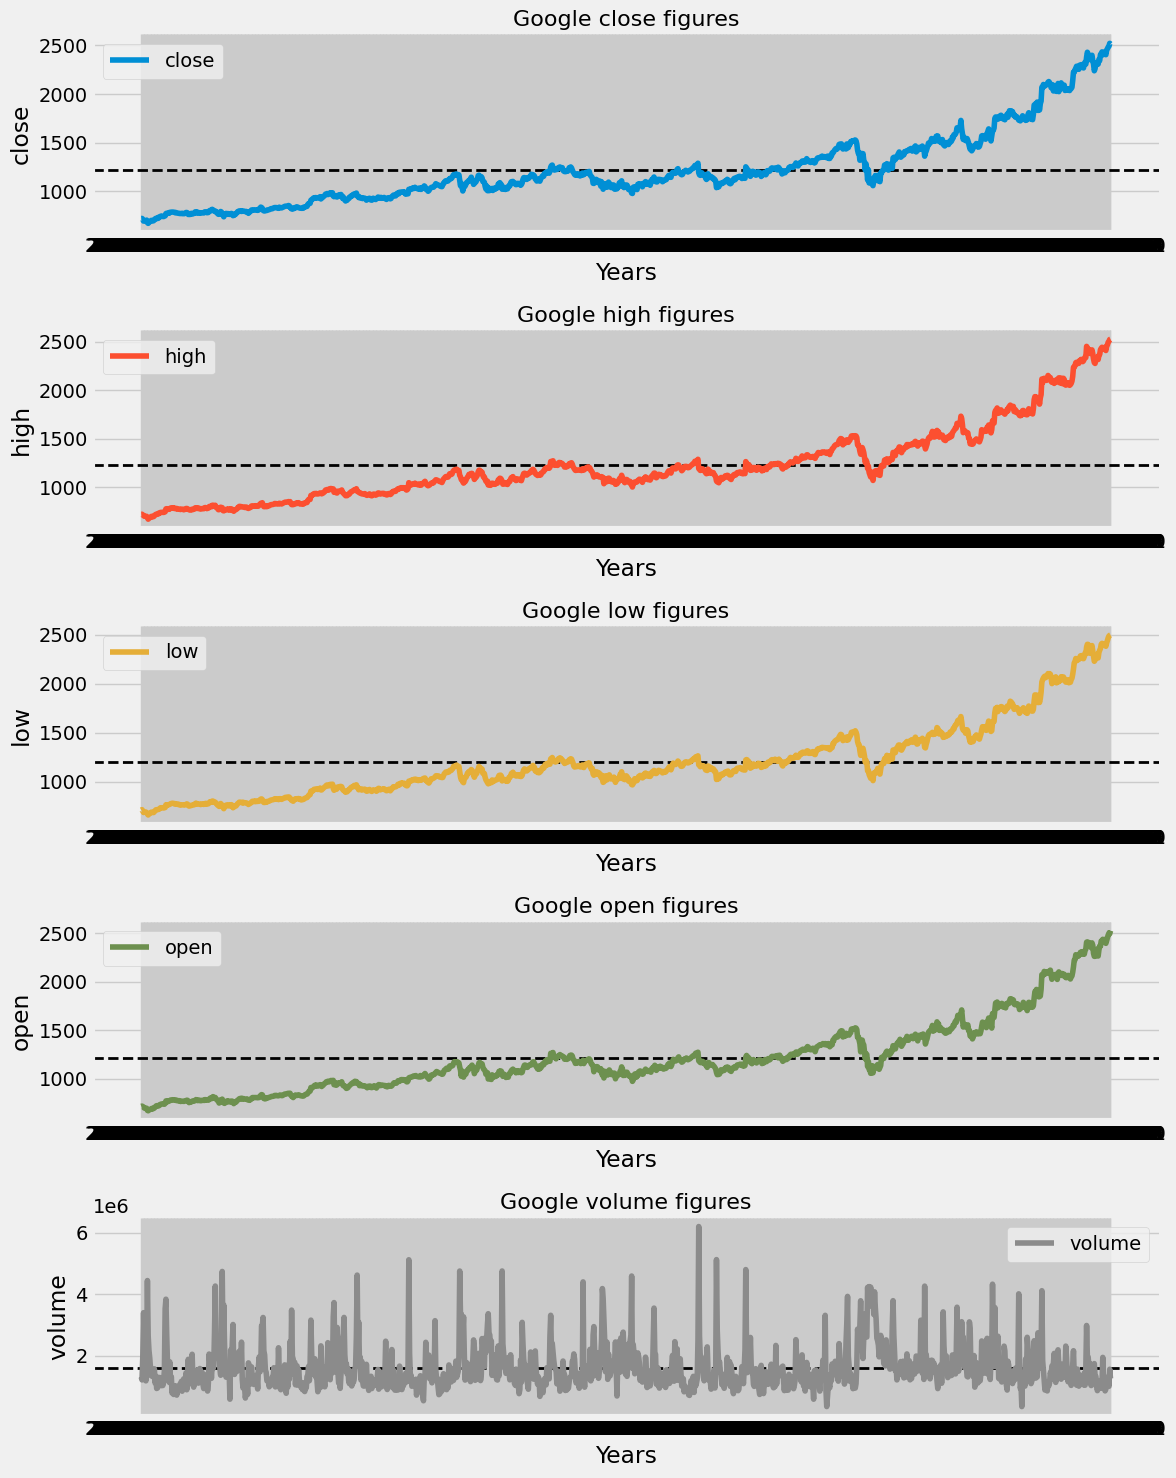

In [24]:
a = 5  # number of rows
b = 1  # number of columns
c = 1  # initialize plot counter
colors = plt.rcParams["axes.prop_cycle"]()
# A figure is initialized 
fig = plt.figure(figsize=(12,15))

for i in range(len(df.columns)):
    color = next(colors)["color"]
    plt.subplot(a, b, c)
    #Plotting the line for each column in a different color
    plt.plot(df[df.columns[i]], color = color)
    # The spines of each plot are made invisible and the figure is adjusted and shown.
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    #Adding a horizontal line for the average of the column
    plt.axhline(df[df.columns[i]].mean(), linestyle='--', lw=2, zorder=1, color='black')
    #Adding Title
    plt.title("Google "+ df.columns[i] + " figures", fontsize=16)
    plt.xlabel('Years')
    #Adding y axis label
    plt.ylabel(df.columns[i])
    #Adding Legend
    plt.legend([df.columns[i]])
    #Plot Counter value is increased by one after each iteration
    c = c + 1

#Layout is tightended up
plt.tight_layout()

#plot is displayed
plt.show()

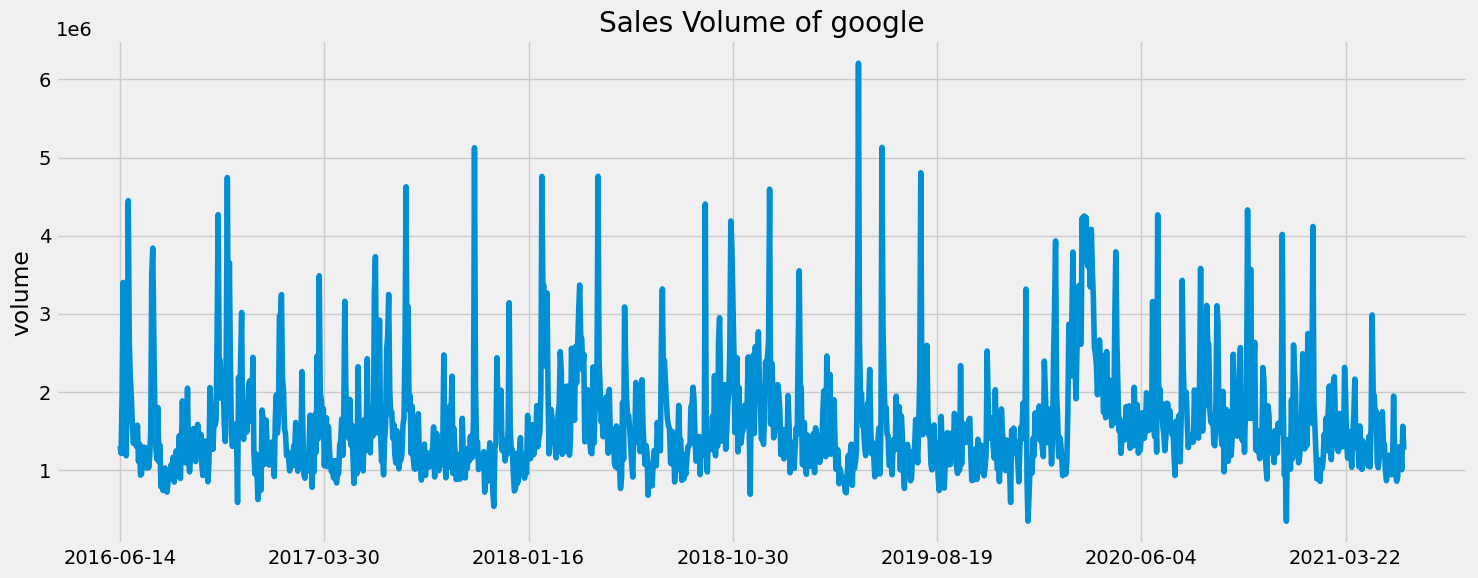

In [25]:
plt.figure(figsize=(15, 6))
df['volume'].plot()
plt.ylabel('volume')
plt.xlabel(None)
plt.title("Sales Volume of google")
plt.tight_layout()
plt.show()

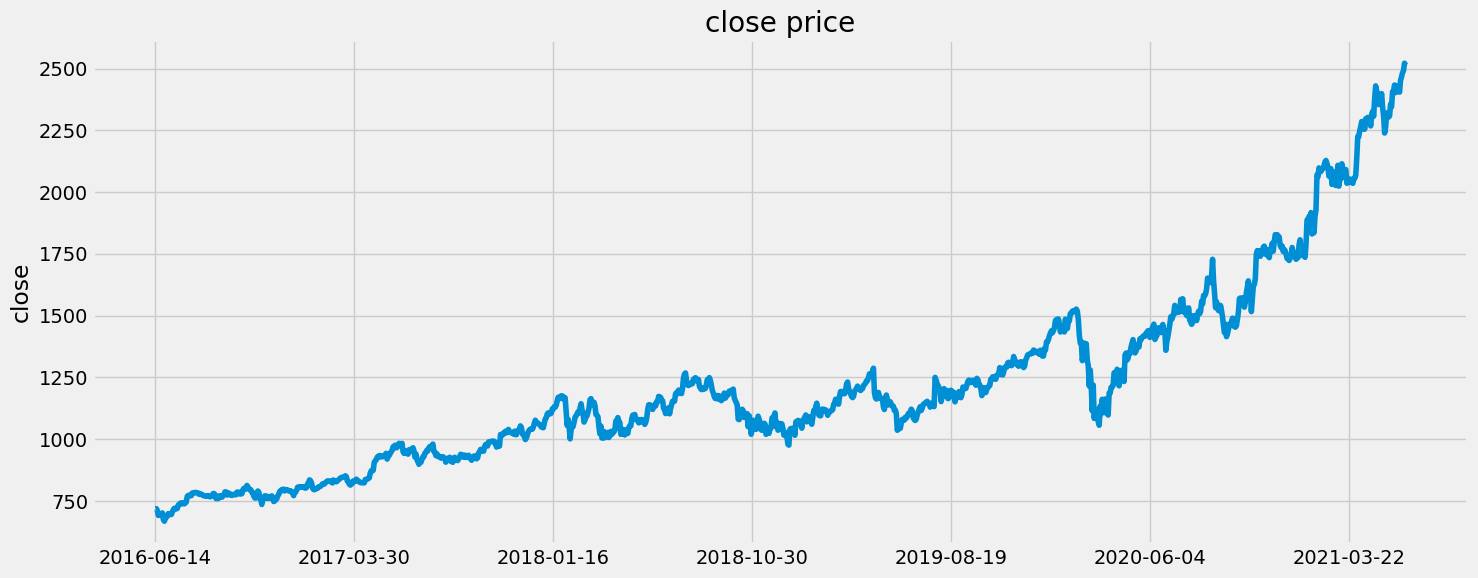

In [26]:
plt.figure(figsize=(15, 6))
df['close'].plot()
plt.ylabel('close')
plt.xlabel(None)
plt.title("close price")
plt.tight_layout()
plt.show()

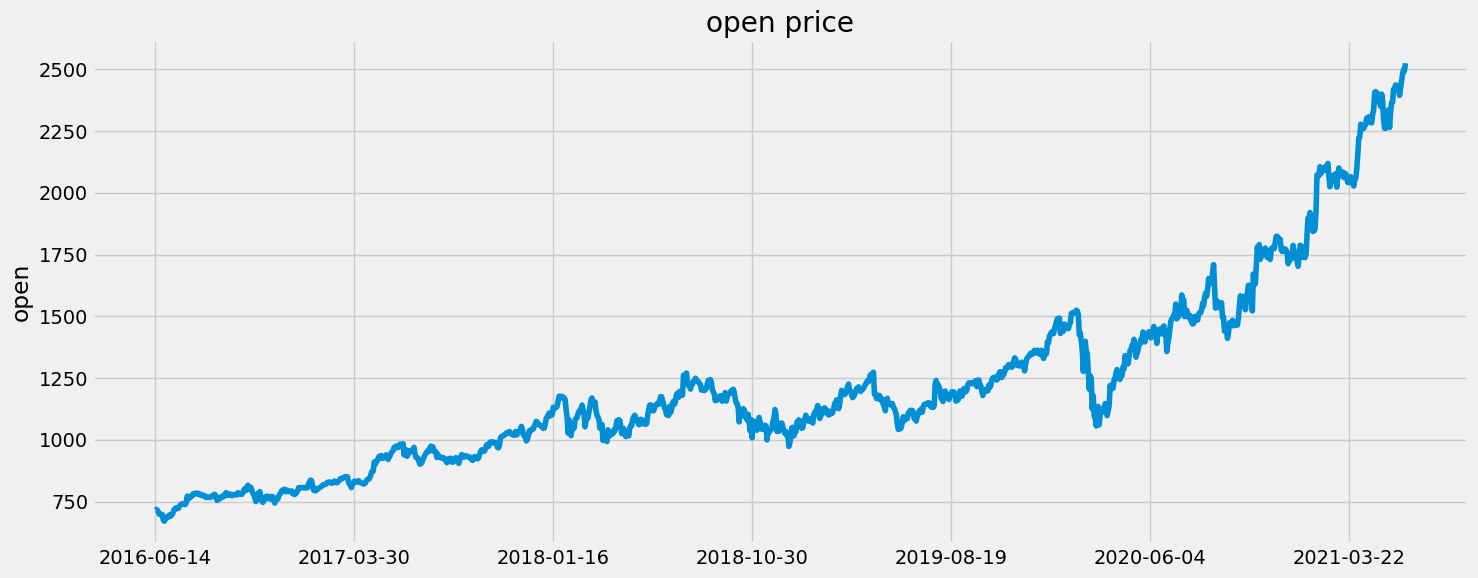

In [27]:
plt.figure(figsize=(15, 6))
df['open'].plot()
plt.ylabel('open')
plt.xlabel(None)
plt.title("open price")
plt.tight_layout()
plt.show()

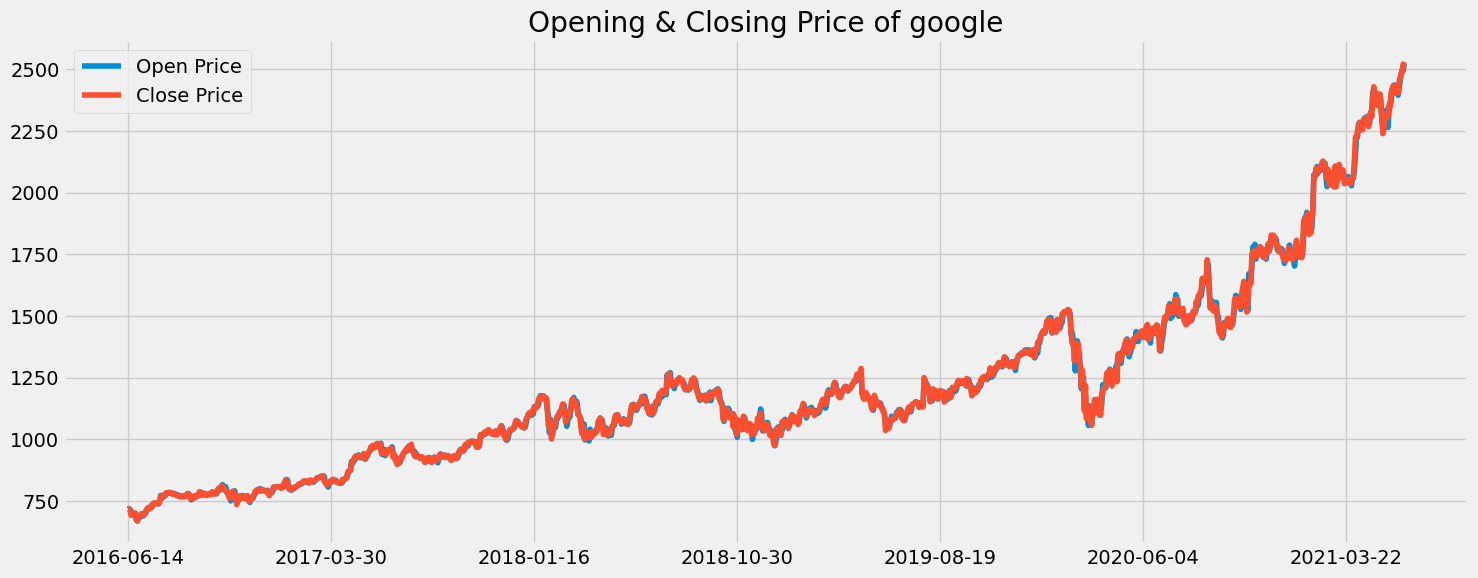

In [28]:
plt.figure(figsize=(15, 6))
df['open'].plot()
df['close'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("Opening & Closing Price of google")
plt.legend(['Open Price', 'Close Price'])
plt.tight_layout()
plt.show()

In [29]:
pre = df["close"]
pre = pd.DataFrame(pre)

data = pre.values

data.shape

(1258, 1)

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(np.array(data).reshape(-1, 1))

In [31]:

train_size = int(len(data)*.75)
test_size = len(data) - train_size

print("Train Size :",train_size,"Test Size :",test_size)

train_data = scaled_data[ :train_size , 0:1 ]
test_data = scaled_data[ train_size-60: , 0:1 ]

Train Size : 943 Test Size : 315


In [32]:

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [33]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [34]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [35]:
model = Sequential([
    LSTM(50, return_sequences= True, input_shape= (x_train.shape[1], 1)),
    LSTM(64, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(1)
])

model.compile(optimizer= 'adam', loss= 'mse' , metrics= ["mean_absolute_error"])

C:\Users\Vignesh T\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:
tf.keras.utils.plot_model(model,show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [37]:
callbacks = [EarlyStopping(monitor= 'loss', patience= 10 , restore_best_weights= True)]
history = model.fit(x_train, y_train, epochs= 50, batch_size= 32 , callbacks= callbacks )

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0154 - mean_absolute_error: 0.0952
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0013 - mean_absolute_error: 0.0286
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 4.4932e-04 - mean_absolute_error: 0.0145
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 5.1619e-04 - mean_absolute_error: 0.0163
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 3.6785e-04 - mean_absolute_error: 0.0139
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 4.1925e-04 - mean_absolute_error: 0.0146
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 3.3371e-04 - mean_absolute_error: 0.0135
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 3.5375e-04 - mean_absolute_error: 0.0142
Epoch 9/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 3.3424e-04 - mean_absolute_error: 0.0138
Epoch 10/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 3.6101e-04 - mean_absolute_error: 0.0139
Epoch 1

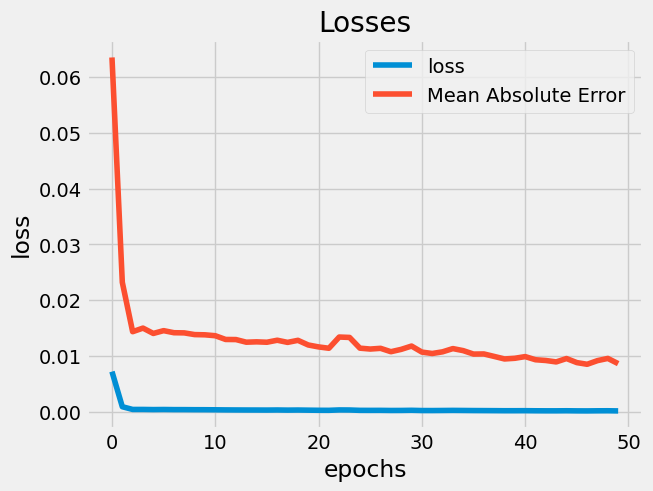

In [38]:
plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.legend(['loss','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [39]:
x_test = []
y_test = []

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [40]:
predictions = model.predict(x_test)

#inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step


(315, 1)

In [41]:
y_test = scaler.inverse_transform([y_test])

RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
RMSE

41.1

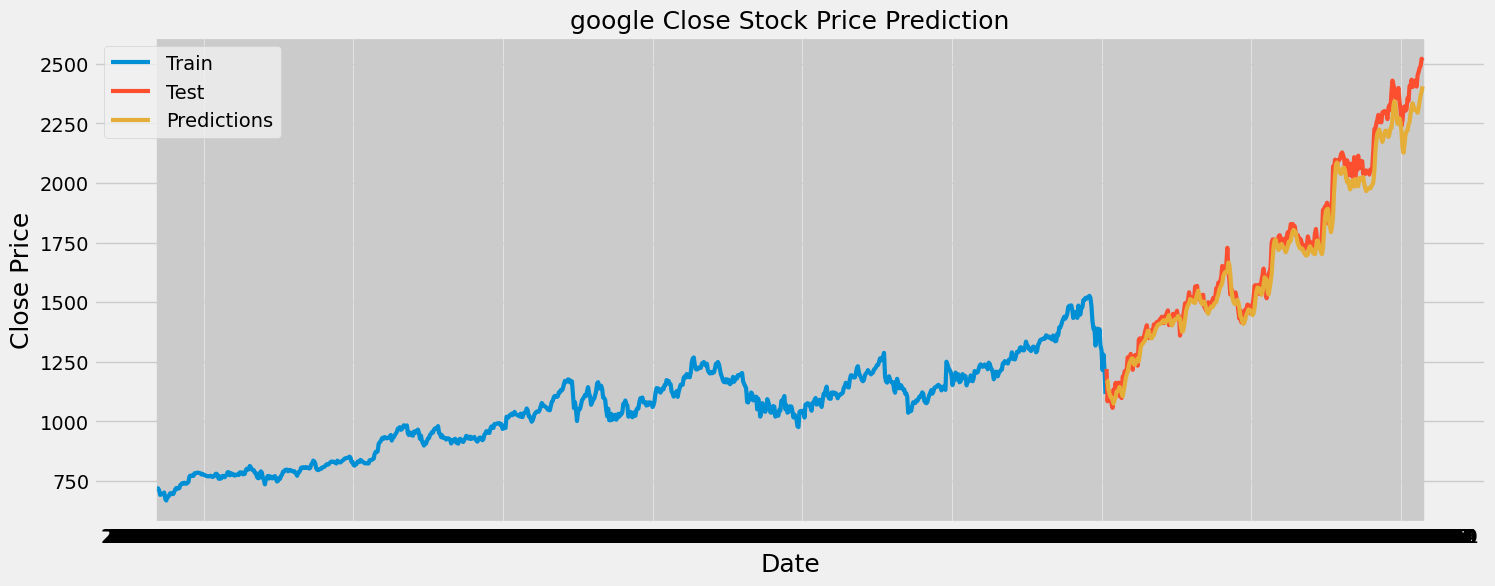

In [42]:
train = pre.iloc[:train_size , 0:1]
test = pre.iloc[train_size: , 0:1]
test['Predictions'] = predictions

plt.figure(figsize= (16, 6))
plt.title('google Close Stock Price Prediction', fontsize= 18)
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Close Price', fontsize= 18)
plt.plot(train['close'], linewidth= 3)
plt.plot(test['close'], linewidth= 3)
plt.plot(test["Predictions"], linewidth= 3)
plt.legend(['Train', 'Test', 'Predictions'])